In [69]:
# import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt #Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statistics import mean
from fractions import Fraction as fr

steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")
steps.head()
#print(steps)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df = survey.merge(steps, on="id")
df = df[(df["weight"] < 200) & (df["weight"] > 35)]
df = df.fillna(0)
#df["total steps"] = pd.read_csv("steps.csv").sum()
df.head()
#print(df)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight'>

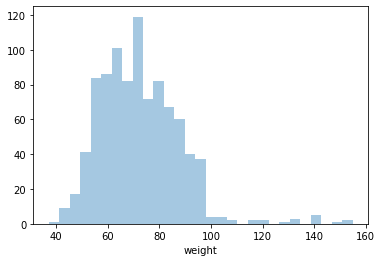

In [71]:
sns.distplot(df["weight"], kde=False) 

In [72]:
df['Mean Steps'] = df.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1)
#print(df)
df.head()
# For some reason it still shows the mean() of the 'id'. I just did that to try the mean(), don't mind it

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean Steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


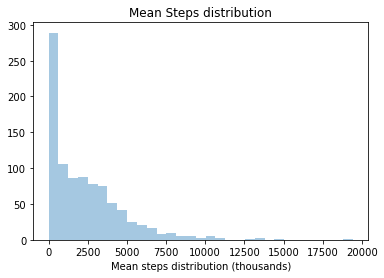

In [43]:
df['Mean Steps'].name = 'Mean steps distribution (thousands)' #Labeling the variable for plotting
file_size = df['Mean Steps'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(file_size, kde=False) 
plt.title('Mean Steps distribution')
plt.show()

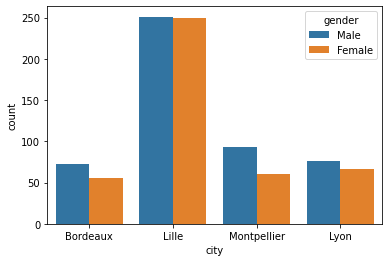

In [73]:
sns.countplot(x="city", hue="gender", data=df)
plt.show()

In the graph below I was just playing with the codes to see the results and for better understand the graphics :) However, it also show us that the main origin of the participants is Lille

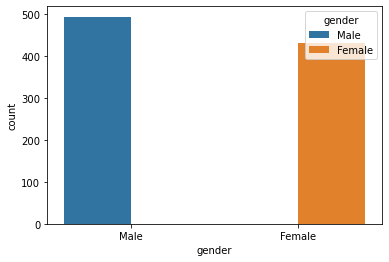

In [74]:
sns.countplot(x="gender", hue="gender", data=df)
plt.show()

More women than men participated in this study

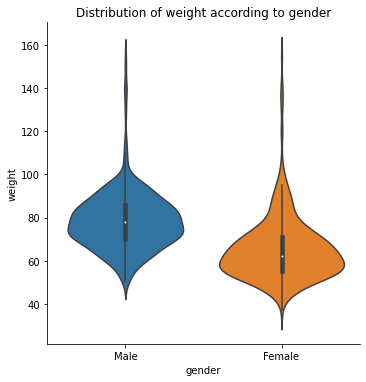

In [75]:
sns.catplot(x="gender", y="weight", kind="violin", data=df)
plt.title('Distribution of weight according to gender')
plt.show()

Assignment 2 - Exploratory Data Analysis

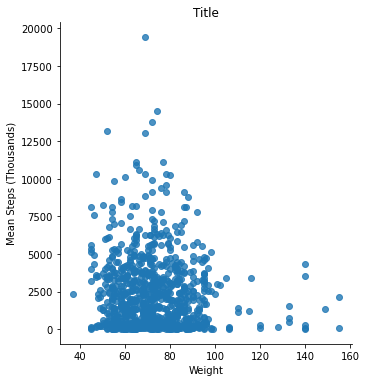

In [76]:
sns.lmplot(x='weight', y='Mean Steps', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Weight') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean Steps (Thousands)')
plt.title('Title')
plt.show()

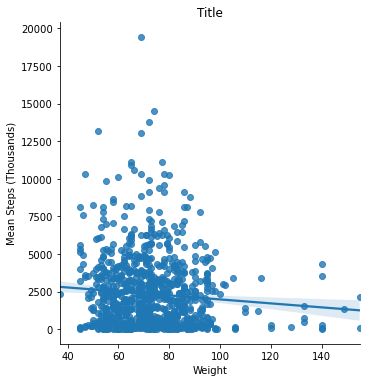

In [47]:
sns.lmplot(x='weight', y='Mean Steps', data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Weight') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean Steps (Thousands)')
plt.title('Title')
plt.show()

In the graphics above we can clearly see that, the higher the weight, the lower the mean number of steps is. We can find a big concentration of mean of steps among the weights 50 to 90kg (aprox) and a significant decrease when the weight is above 100kg.

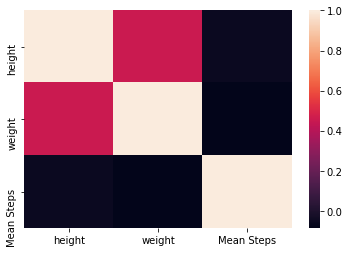

In [49]:
df = pd.DataFrame(df,columns=['height','weight','Mean Steps'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns)
plt.show()

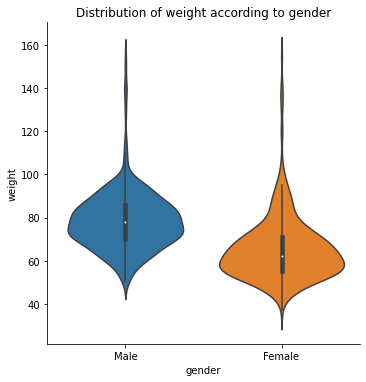

In [77]:
sns.catplot(x="gender", y="weight", kind="violin", data=df)
plt.title('Distribution of weight according to gender')
plt.show()

So here we can see that in the case of men, the weight avarage stands from 60 to 100kg being 70-80 the most populated. While in the women graphic it varies from 40 to 100kg being 60-60 the most populated

Assignment 3 - Linear Regression

Linear Regression is a graphical comparison of two correlated variables displayed in X being the independent variable, and Y being the dependent one. 

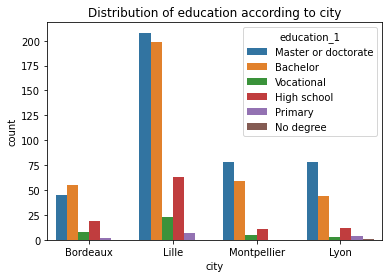

In [88]:
sns.countplot(x="city", hue="education_1", data=df)
plt.title('Distribution of education according to city')
plt.show()

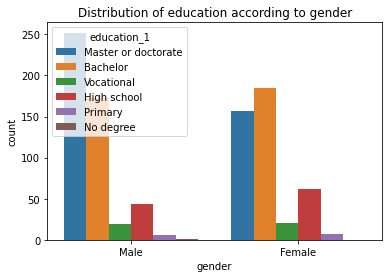

In [87]:
sns.countplot(x="gender", hue="education_1", data=df)
plt.title('Distribution of education according to gender')
plt.show()

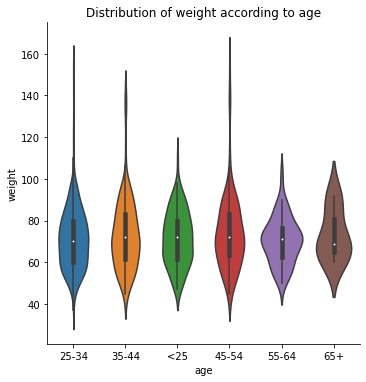

In [85]:
sns.catplot(x="age", y="weight", kind="violin", data=df)
plt.title('Distribution of weight according to age')
plt.show()

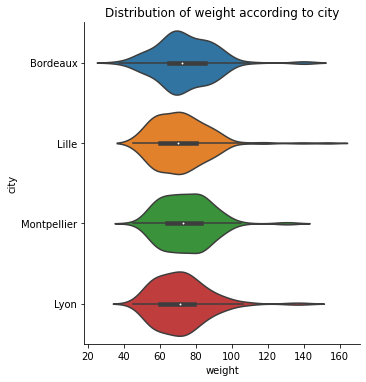

In [86]:
sns.catplot(x="weight", y="city", kind="violin", data=df)
plt.title('Distribution of weight according to city')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


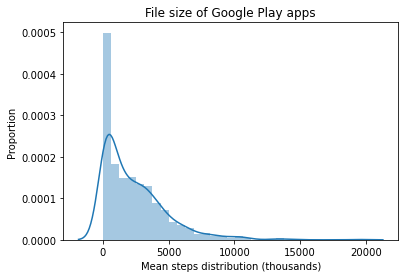

In [84]:
sns.distplot(file_size)
plt.title('File size of Google Play apps')
plt.ylabel('Proportion')
plt.show() 

After this step I had some issues understanding and making the 'Training Data' work.. So I thought I could submit this work and continue working on the rest so I can have a whole feedback from you. Hope that is okay! I'm doing my best :)